<a href="https://colab.research.google.com/github/rising1/MyFirst/blob/master/CrossEntropyModel_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [1750]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import torch
import math
import matplotlib.pyplot as plt
import time

In [0]:
X2 = np.genfromtxt( \
  '/content/drive/My Drive/Colab Notebooks/' \
   'InputDataToy.csv', delimiter=',')
y2 = np.genfromtxt( \
    '/content/drive/My Drive/Colab Notebooks/OutputDataToy.csv', delimiter=',')

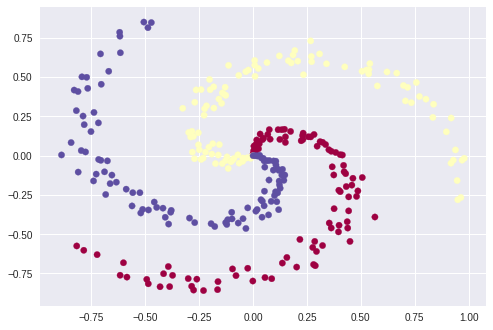

In [1753]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
np.random.seed(5)
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [0]:
# initialize parameters randomly
h = 10 # size of hidden layer
h2 = 30 # size of second hidden layer
h3 = 6
h4 = 3
mini_batch_size = 250

#layers = [X.shape[1],h,3]

epoch=2000 #Setting training iterations
lr = .10045

# some hyperparameters
step_size = 1e-0
reg = 1.0e-3 # regularization strength

# gradient descent loop
#num_examples = X.shape[0]
#print("num_examples=",num_examples)

In [0]:
biases = [np.zeros((1, y)) for y in layers[1:]]
np.random.seed(1)
weights = [lr * np.random.randn(x, y)
             for x, y in zip(layers[:-1], layers[1:])]
db = [np.zeros(b.shape) for b in biases]
dw = [np.zeros(w.shape) for w in weights]
start = time.time()
trial = "y"
#trial = "n"
#shuffle = False
shuffle = True

In [1756]:
for i in range(epoch):
  if(shuffle):
    s = np.arange(X.shape[0])
    np.random.seed(1)
    np.random.shuffle(s)
    X = X[s]
    y = y[s]
  
  mini_batchesX = [
      X[k:k+mini_batch_size]
      for k in range(0, n, mini_batch_size)]
  mini_batchesY = [
      y[k:k+mini_batch_size]
      for k in range(0, n, mini_batch_size)] 
  #print("mini_batchesX=",len(mini_batchesX[0]))
  #print("y=",y)
  #print("mini_batchesY=",mini_batchesY[0])  
  #num_examples = X.shape[0]
  num_examples = len(mini_batchesX[0])
  #mini_batchesX = X
  #mini_batchesY = y
  #layers = [mini_batchesX[0].shape[1],h,h3]
  layers = [mini_batchesX[0].shape[1],h,h2,h3,h4]
  #print("X.shape",X.shape)
  #layers = [mini_batch_size,h,h2,3]
  dlayers = layers[1:]      
  # compute the gradient on scores
 
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2

  if(trial == "y"):
    
    activations = []
    activations.append(mini_batchesX[0])
 
    for n in range(len(layers)-1):
      if(n==0):    
        activations.append(np.maximum(0, np.dot( \
             mini_batchesX[0], weights[n]) + biases[n]))
      else:
        # note activations is one ahead of where you would expect
        if(n < len(layers)-1):
          activations.append(np.maximum(0,np.dot(activations[n], \
                                    weights[n]) + biases[n]))
        else:
          activations.append(np.dot(activations[n], \
                                    weights[n]) + biases[n])          
    #print("activations=",activations)  
    exp_scores = np.exp(activations[len(activations)-1])
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    corect_logprobs = -np.log(probs[range(num_examples),mini_batchesY[0]])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0
    for v in range(len(weights)):
      #reg_loss = reg_loss + 1/len(weights) * reg * np.sum(weights[v] **2)
      reg_loss += 1/len(weights) * reg * np.sum(weights[v] **2)
      #print("reg_loss[",v,"]=",reg_loss)
    loss = data_loss + reg_loss
  
    if i % 1000 == 0:
      end = time.time()
      print ("iteration %d: loss %f" % (i, loss), \
          "   minutes=",int((end - start)/60) , \
          "   seconds=", round((end - start)%60,1))     
    
    for j in range(len(activations)-2,-1,-1): 
      if(j == len(activations)-2):
        #print("n=",j)
        dlayers[j] = probs
        dlayers[j][range(num_examples),mini_batchesY] -= 1
        dlayers[j] /= num_examples      
        dw[j] = np.dot(activations[j].T, dlayers[j]) 
        db[j] = np.sum(dlayers[j],axis=0,keepdims=True)
      else:  
        # next backprop into hidden layers
        dlayers[j] = np.dot(dlayers[j+1], weights[j+1].T)  
        # backprop the ReLU non-linearity
        #print("n=",n, " j+1=",j+1)
        dlayers[j][activations[j+1] <= 0] = 0  
        # finally into W,b
        dw[j] = np.dot(activations[j].T, dlayers[j])
        db[j] = np.sum(dlayers[j], axis=0, keepdims=True)
    for k in range(len(weights)-1,-1,-1):
      dw[k] += reg * weights[k]
      weights[k] += -step_size * dw[k]
    for k in range(len(biases)-1,-1,-1):
      biases[k] += -step_size * db[k]


iteration 0: loss 1.099741    minutes= 0    seconds= 0.1
iteration 1000: loss 0.435100    minutes= 0    seconds= 0.8


In [1757]:
if(trial == "y"):# evaluate training set accuracy
  for a in range(len(activations)-2):
    activations[a+1] = np.maximum(0, np.dot(activations[a], \
                                    weights[a]) + biases[a])
  predicted_class = np.argmax(activations[len(activations)-1], axis=1)
  print ('training accuracy: %.2f' % (np.mean(predicted_class == mini_batchesY[0])))


training accuracy: 0.98


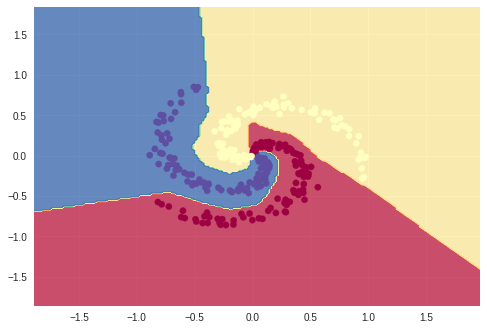

In [1758]:
if(trial == "y"):   # plot the resulting classifier
  h = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  for i in range(len(weights)):
    if(i == 0):
      Z = np.maximum(0, np.dot( \
              np.c_[xx.ravel(), yy.ravel()], \
              weights[0]) + biases[0])
    else:
      Z = np.dot(np.maximum(0, Z),weights[i]) + biases[i]

  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  #fig.savefig('spiral_net.png')
  
